In [1]:
from qiskit import *
import math
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

### Generating two partially entangled states

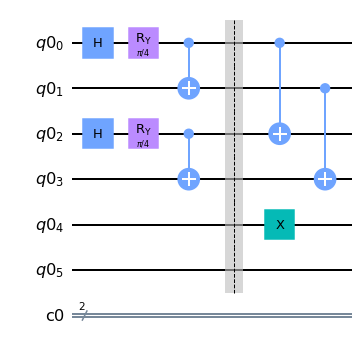

In [2]:
theta = math.pi / 4 #choose theta between -pi/2 and pi/2

# creating the initial entangled state
qr = QuantumRegister(6)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h([0,2])
circuit.ry(theta, [0, 2])

# visualization of the rotation around the y-axis
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector  = result.get_statevector()
plot_bloch_multivector(statevector) 

circuit.cx([0, 2], [1, 3])
circuit.barrier()
circuit.x(4)
circuit.cx([0, 1], [2, 3])
%matplotlib inline
circuit.draw(output='mpl')

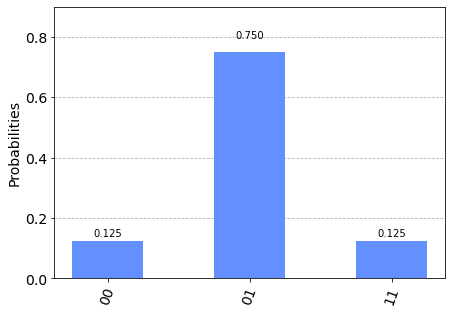

In [3]:
circuit.measure([2, 3], [0, 1])
circuit.swap([0, 1], [4, 5]).c_if(cr, 3)
circuit.measure([4, 5], [0,1])

    
simulator = Aer.get_backend('qasm_simulator')
shots = 2**15
result = execute(circuit, backend = simulator, shots=shots).result()
plot_histogram(result.get_counts(circuit))

    
    

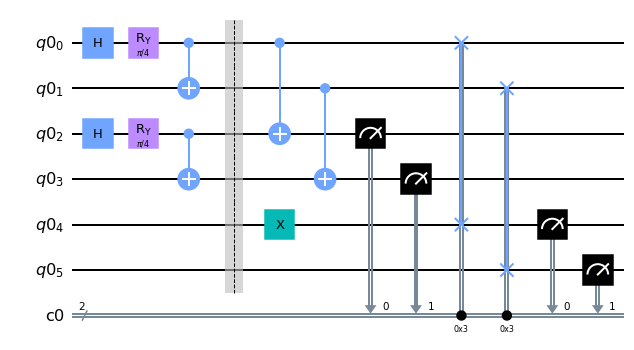

In [4]:
circuit.draw(output = 'mpl')


In [ ]:
    
circuit.measure(qr[k:(3 * k // 2) - 1], output[:(N // 4) - 1])
simulator = Aer.get_backend('qasm_simulator')
shots = 2**15
result = execute(circuit, backend = simulator, shots=shots).result()
plot_histogram(result.get_counts(circuit))
